This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1)) #张量，装数字1，形状（2,1）
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [5]:
#正态分布随机数
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.) #E=0 ，std=1
print(x)

tf.Tensor(
[[-0.3332715]
 [ 0.0711503]
 [-0.2585515]], shape=(3, 1), dtype=float32)


In [7]:
#均匀分配抓随机数 
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.) 
print(x)

tf.Tensor(
[[0.5494702 ]
 [0.5289264 ]
 [0.09264088]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [9]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

x

array([[0., 1.],
       [1., 1.]])

但是在TensorFlow中不行

In [13]:
x = tf.ones(shape=(2, 2))

x[0, 0] = 0.

TypeError: ignored

**Creating a TensorFlow variable**

如果需要一个能够变的数据集的话，需要放在tf.Variable里面，代表它是个变数

In [15]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.30655324],
       [ 0.13945615],
       [-1.475825  ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [22]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [23]:
#只变动[0, 0]位置的数字为3
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [26]:
#相当于numpy中的+=
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[5.],
       [3.],
       [3.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [29]:
a = tf.ones((2, 2))
b = tf.square(a) #a里面每个数都平方
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b) #矩阵乘法

In [30]:
print(a)
print(b)
print(c)
print(d)
print(e)


tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [31]:
e *= d
print(e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [32]:
input_var = tf.Variable(initial_value=3.) #变数起始值为3

with tf.GradientTape() as tape:
   result = tf.square(input_var) #做平方

gradient = tape.gradient(result, input_var) #相当于x^2对x做微分

In [33]:
gradient # 2 * x = 6

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using `GradientTape` with constant tensor inputs**

In [35]:
input_const = tf.constant(3.) 

with tf.GradientTape() as tape:
   #tape.watch(input_const)
   result = tf.square(input_const)

gradient = tape.gradient(result, input_const)

gradient

#TensorFlow对放在constant里的东西视而不见，相当于不是可训练的variable

In [36]:
input_const = tf.constant(3.) 

with tf.GradientTape() as tape:
   tape.watch(input_const) #让电脑看这个constant里的变数
   result = tf.square(input_const)

gradient = tape.gradient(result, input_const)

gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using nested gradient tapes to compute second-order gradients**

In [39]:
time = tf.Variable(0.)

with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2  
    speed = inner_tape.gradient(position, time) #位移对时间进行一次微分 = 速度
acceleration = outer_tape.gradient(speed, time) #位移对时间进行两次微分 = 加速度

print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [40]:
#做一个线性分类器
num_samples_per_class = 1000
#生成1k个点，从多元常态分类里生成，中心点在[0, 3]，每个点有2个坐标，shape = (1000, 2)
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
#同理，shape = (1000, 2)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [41]:
#vertical_stack 垂直叠加
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [42]:
#做了两个（1000, 1）的target
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

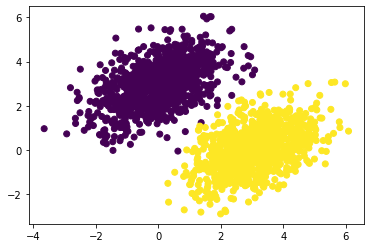

In [43]:
import matplotlib.pyplot as plt
#画散点图，需要把每个点的x和y标出来
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [44]:
# prediction = W * input + b

#[2000 * 2] * [2 * 1] + b
input_dim = 2 #每一个input有2个变数（两个特征）
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [45]:
def model(inputs):
    return tf.matmul(inputs, W) + b #得到[2000 * 1]的二维张量

**The mean squared error loss function**

In [46]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [48]:
#做个梯度下降

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) #loss对W和b做微分
    W.assign_sub(grad_loss_wrt_W * learning_rate) #W = W - 学习速率 * gradient
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [49]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.7973
Loss at step 1: 0.3575
Loss at step 2: 0.1527
Loss at step 3: 0.1200
Loss at step 4: 0.1094
Loss at step 5: 0.1020
Loss at step 6: 0.0956
Loss at step 7: 0.0897
Loss at step 8: 0.0844
Loss at step 9: 0.0795
Loss at step 10: 0.0749
Loss at step 11: 0.0708
Loss at step 12: 0.0670
Loss at step 13: 0.0635
Loss at step 14: 0.0604
Loss at step 15: 0.0574
Loss at step 16: 0.0548
Loss at step 17: 0.0523
Loss at step 18: 0.0501
Loss at step 19: 0.0480
Loss at step 20: 0.0461
Loss at step 21: 0.0444
Loss at step 22: 0.0428
Loss at step 23: 0.0413
Loss at step 24: 0.0400
Loss at step 25: 0.0387
Loss at step 26: 0.0376
Loss at step 27: 0.0366
Loss at step 28: 0.0356
Loss at step 29: 0.0348
Loss at step 30: 0.0340
Loss at step 31: 0.0333
Loss at step 32: 0.0326
Loss at step 33: 0.0320
Loss at step 34: 0.0314
Loss at step 35: 0.0309
Loss at step 36: 0.0304
Loss at step 37: 0.0300
Loss at step 38: 0.0296
Loss at step 39: 0.0292


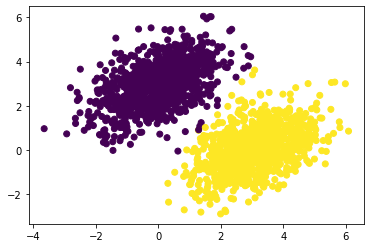

In [50]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

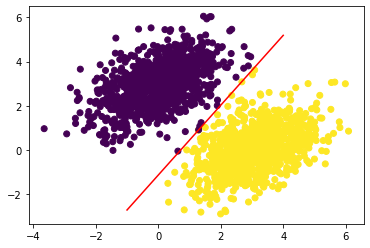

In [51]:
# W1x + W2y + b = 0.5
# draw y = - w1 / w2 * x + (0.5 - b) / w2
x = np.linspace(-1, 4, 100) #x从-1到4平分99段，得100个点，带入方程式
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [54]:
predictions = np.where(predictions[:, 0] > 0.5, 1, 0) #预测值大于0.5为1
predictions

array([0, 0, 0, ..., 1, 1, 1])

In [57]:
targets = targets.reshape(2000)

In [58]:
(predictions == targets).sum()

1994

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

#### Automatic shape inference: Building layers on the fly

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

In [ ]:
history.history

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

## Summary